<a href="https://colab.research.google.com/github/shahma123/codsoft/blob/main/iris_classification/%20iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
csv_fname = list(uploaded.keys())[0]
print("Uploaded file:", csv_fname)

Saving IRIS.csv to IRIS.csv
Uploaded file: IRIS.csv


Saving outputs to: /content/drive/MyDrive/Colab Notebooks/iris_classification
Training pipeline on Iris dataset now...
Training finished.

Test Accuracy: 0.9333

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model summary sentence: Logistic Regression classifier (pipeline) achieves 93.333% test accuracy and effectively classifies Iris species for this dataset.


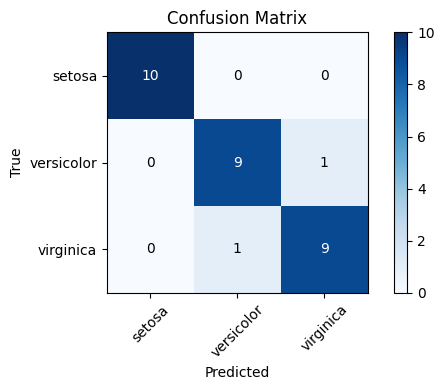

In [5]:

import os, joblib
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.validation import check_is_fitted


out_dir = "/content/drive/MyDrive/Colab Notebooks/iris_classification"
os.makedirs(out_dir, exist_ok=True)
print("Saving outputs to:", out_dir)


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', max_iter=500, random_state=42))
])

print("Training pipeline on Iris dataset now...")
pipeline.fit(X_train, y_train)
print("Training finished.")


y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
ax.set_xticks(np.arange(len(iris.target_names)))
ax.set_yticks(np.arange(len(iris.target_names)))
ax.set_xticklabels(iris.target_names, rotation=45)
ax.set_yticklabels(iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im)
plt.tight_layout()


conf_path = os.path.join(out_dir, "confusion_matrix.png")
fig.savefig(conf_path, bbox_inches='tight')

model_path = os.path.join(out_dir, "iris_model.pkl")
joblib.dump(pipeline, model_path)




print(f"\nModel summary sentence: Logistic Regression classifier (pipeline) achieves {acc:.3%} test accuracy and effectively classifies Iris species for this dataset.")